# 1 - Introduction

### 1.5 Datasets

In [1]:
from sklearn.datasets import load_boston

In [2]:
import pandas as pd

In [3]:
data, target=load_boston(True)

In [4]:
bostonDF= pd.DataFrame(data, columns=load_boston().feature_names)

In [5]:
bostonDF['label']=target

In [6]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
gamesDF= pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")

In [8]:
gamesDF.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1


## Using BigQuery (provided by google cloud library) to read Data 

In [9]:
from google.cloud import bigquery
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/ec2-user/dsdemo.json'


In [10]:
client= bigquery.Client()

In [11]:
sql = """
  SELECT * 
  FROM  `bigquery-public-data.samples.natality`
  limit 10
"""

In [12]:
natalityDF= client.query(sql).to_dataframe()
natalityDF.head()

,source_year,year,month,day,wday,state,is_male,child_race,weight_pounds,plurality,...,alcohol_use,drinks_per_week,weight_gain_pounds,born_alive_alive,born_alive_dead,born_dead,ever_born,father_race,father_age,record_weight
0,2005,2005,3,NaN,4.0,None,False,NaN,6.563162,1,...,False,None,30.0,8.0,0.0,0.0,9,78,45,1
1,2005,2005,6,NaN,1.0,None,False,NaN,4.433496,1,...,None,None,99.0,15.0,1.0,0.0,17,68,41,1
2,2005,2005,3,NaN,6.0,None,True,NaN,7.500126,1,...,False,None,15.0,8.0,0.0,0.0,9,68,38,1
3,2005,2005,12,NaN,1.0,None,False,NaN,6.768191,1,...,False,None,17.0,10.0,0.0,1.0,11,68,45,1
4,2005,2005,5,NaN,3.0,None,True,NaN,6.680007,1,...,False,None,99.0,7.0,0.0,0.0,8,7,41,1


## Reading data directly from Kaggle

In [13]:
import pandas as pd

In [14]:
nhldf=pd.read_csv('game.csv')

In [15]:
nhldf.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


# 1.6 Prototype Models

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load Boston housing data set 
data, target = load_boston(True)
bostonDF = pd.DataFrame(data, columns=load_boston().feature_names)
bostonDF['label'] = target

# create train and test splits of the housing data set 
x_train, x_test, y_train, y_test = train_test_split(bostonDF.drop(['label'], axis=1), bostonDF['label'], test_size=0.33)

# train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# print results 
print("R^2: " + str(model.score(x_test, y_test)))
print("Mean Error: " + str(sum(abs(y_test - model.predict(x_test) ))/y_test.count()))

R^2: 0.754633738236015
Mean Error: 3.56502738113933


### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

gamesDF = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")

# create train and test splits of the game data set 
x_train, x_test, y_train, y_test = train_test_split(gamesDF.drop(['label'], axis=1), gamesDF['label'], test_size=0.33)

# train a linear regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# print results 
print("Accuracy: " + str(model.score(x_test, y_test)))
print("ROC: " + str(roc_auc_score(y_test, model.predict_proba(x_test)[:, 1] )))

Accuracy: 0.8712792697446752
ROC: 0.7574710557974115


### Keras Regression

In [18]:
import tensorflow as tf
import keras
from keras import models, layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
keras.__version__

/home/ec2-user/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ec2-user/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ec2-user/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ec2-user/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

'2.2.4'

In [19]:
# create train and test splits of the game data set 
x_train, x_test, y_train, y_test = train_test_split(gamesDF.drop(['label'], axis=1), gamesDF['label'], test_size=0.33)

# define the network strcuture 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# define ROC AUC as a metric since ROC is not supported directly bu Keras
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    keras.backend.get_session().run(tf.local_variables_initializer())
    return auc
    
# compile and fit the model    
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=[auc])
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split = .2, verbose=0)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


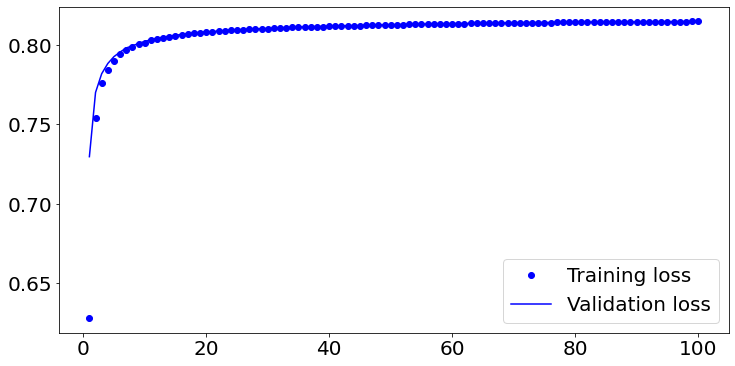

In [20]:
loss = history.history['auc']
val_loss = history.history['val_auc']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12,6) )
plt.rcParams.update({'font.size': 20})
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [21]:
# results better then the logistic regression (0.76)
results = model.evaluate(x_test, y_test, verbose = 0)
print("ROC: " + str(results[1]))

ROC: 0.8147313892171092


# 1.7 Automated Feature Engineering

#### Instead of spending days/weeks coming up with the best features to describe a data set, we can build tools that aproximate this process

In [1]:
import pandas as pd

game_df = pd.read_csv("game.csv")

In [ ]:
plays_df = pd.read_csv("game_plays.csv")

In [ ]:

plays_df = plays_df.drop(['secondaryType', 'periodType', 
                 'dateTime', 'rink_side'], axis=1).fillna(0)

In [ ]:
import featuretools as ft
from featuretools import Feature 

es = ft.EntitySet(id="plays")
es = es.entity_from_dataframe(entity_id="plays", dataframe=plays_df, index="play_id",
           variable_types = { "event": ft.variable_types.Categorical, 
                             "description": ft.variable_types.Categorical })       

f1 = Feature(es["plays"]["event"])
f2 = Feature(es["plays"]["description"])

encoded, defs = ft.encode_features(plays_df, [f1, f2], top_n=10)
encoded.reset_index(inplace=True)
encoded.head()

In [ ]:
es = ft.EntitySet(id="plays")
es = es.entity_from_dataframe(entity_id="plays", dataframe=encoded, index="play_id")
es = es.normalize_entity(base_entity_id="plays",new_entity_id="games", index="game_id")

features,transform=ft.dfs(entityset=es,target_entity="games",max_depth=2)
features.reset_index(inplace=True)
features.head()

In [ ]:
import framequery as fq

# assign labels to the generated features
features = fq.execute("""
  SELECT f.*, case when g.type = 'P' then 1 else 0 end as label
  FROM features f 
  JOIN game_df g
    on f.game_id = g.game_id
""")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# create inputs for sklearn
y = features['label']
X = features.drop(['label', 'game_id'], axis=1).fillna(0)

# train a classifier 
lr = LogisticRegression()
model = lr.fit(X, y)

# Results
print("Accuracy: " + str(model.score(X, y)))
print("ROC: " + str(roc_auc_score(y, model.predict_proba(X)[:, 1] )))